<a href="https://colab.research.google.com/github/AhmadJalal789/Projects/blob/main/Final_Project_Guide_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Write Your Final Project Title Here

Submitted by:

Last Name, First Name 1

Last Name, First Name 2

Last Name, First Name 3

Last Name, First Name 4

## Executive Summary

This section should summarize the whole project. Treat this like a research "abstract". In about 250 to 300 words, you should be able to briefly discuss your whole project. Below are some guide questions:

- Does the executive summary contain a problem statement?
- Does the executive summary introduce the dataset under study?
- Does the executive summary briefly introuce the model used?
- Does the executive summary present/discuss important results?
- Does the executive summary properly communicate the relevant insights in the study?

## Problem Statement and Significance of the Study
This section should provide a description of the problem that the project is trying to solve. It should include the context of the problem and its background, the reasons why it is important to address the problem, and the goals and objectives of the
project. It should also describe how the results of the analysis will address the problem the project is trying to solve.

## Data Description
This section should describe the dataset that will be used for the analysis.

- Does the report describe the raw data properly and provides simple but relevant statistics?
- Does the report describe the relevant columns or fields that the dataset have?

Load your data and import relevant libraries.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/Student-Employability-Datasets.csv')

In [ ]:
df.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


## Exploratory Data Analysis
Please include some visualizations and descriptive analysis on the dataset. You may refer to existing EDA already done on the project online, as long as it is relevant to the study.

For this section, I am leaving the decision to the group on whether to use Python or other tools. If you choose to use external visualization tools, you may just attach the images here in this notebook. Please try to look it up. You might need to attach the images in your submission (inside a zip file).

In [ ]:
import seaborn as sns

In [ ]:
# Drop unnecessary columns
cols_to_drop = ['CLASS', 'Name of Student', 'Student Performance Rating']
new_df = df.drop(columns=cols_to_drop)

# Calculate total values for each skill
total = pd.DataFrame({
    'Skills': new_df.columns,
    'Total Value': new_df.sum()
})

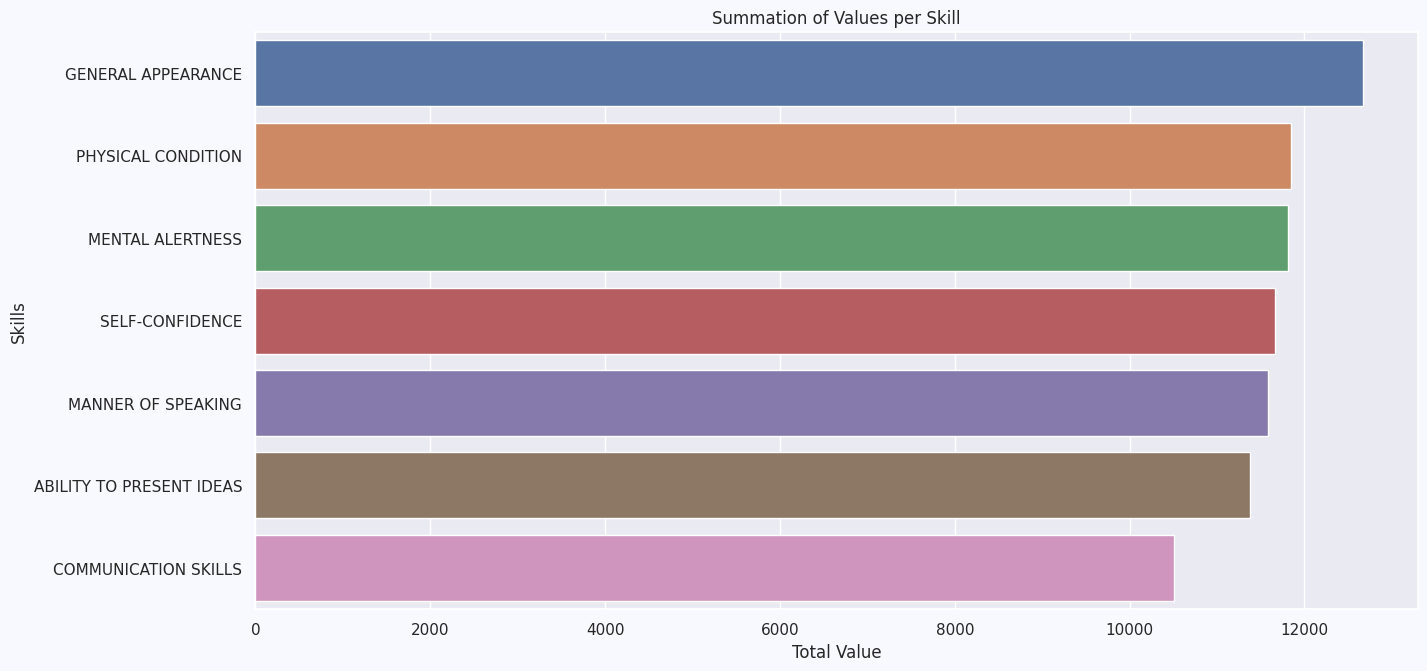

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style="darkgrid", palette="deep")

ax = sns.barplot(
    y = 'Skills',
    x='Total Value',
    data = total.sort_values(
        'Total Value',
        ascending = False
    )
)

plt.title('Summation of Values per Skill')
plt.show()

# Filipino Students are lacking of communicating skills but has the best general appearance

Filipino Students are lacking of communicating skills but has the best general appearance

In [ ]:
df_employed = df.loc[df['CLASS'] == 'Employable']


cols_to_drop = ['Name of Student', 'CLASS']
df_employed = df_employed.drop(columns=cols_to_drop)


ave_skills = pd.DataFrame({
    'Average Score': df_employed.mean()
})

ave_skills

,Average Score
GENERAL APPEARANCE,4.314054
MANNER OF SPEAKING,4.012146
PHYSICAL CONDITION,4.076345
MENTAL ALERTNESS,4.097744
SELF-CONFIDENCE,4.008097
ABILITY TO PRESENT IDEAS,3.887796
COMMUNICATION SKILLS,3.609601
Student Performance Rating,4.610179


In [ ]:
df_employed.head()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
0,4,5,4,5,5,5,5,5
1,4,4,4,4,4,4,3,5
4,4,4,3,3,4,4,3,5
5,4,4,3,3,3,3,3,5
6,4,4,4,3,3,3,3,3


In [ ]:

pie_data = ave_skills.drop('Student Performance Rating')


pie_data

,Average Score
GENERAL APPEARANCE,4.314054
MANNER OF SPEAKING,4.012146
PHYSICAL CONDITION,4.076345
MENTAL ALERTNESS,4.097744
SELF-CONFIDENCE,4.008097
ABILITY TO PRESENT IDEAS,3.887796
COMMUNICATION SKILLS,3.609601


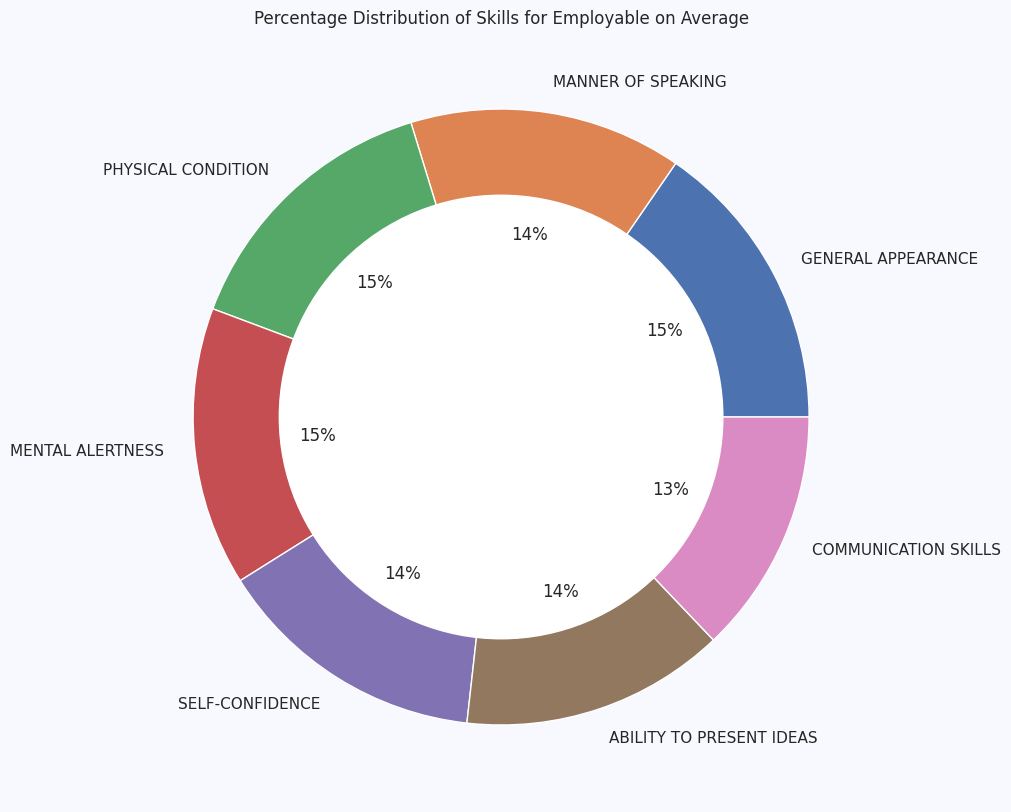

In [ ]:
palette_color = sns.color_palette(palette='deep')

fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_facecolor('ghostwhite')

wedges, _, labels = ax.pie(
    pie_data['Average Score'],
    labels=pie_data.index,
    colors=palette_color,
    autopct='%.0f%%'
)

centre_circle = plt.Circle((0, 0), 0.72, fc='white')
ax.add_artist(centre_circle)

ax.set_title('Percentage Distribution of Skills for Employable on Average')

plt.show()

Analyzing the Distribution of the Skills for Employable Students, We can see that these Skills are almost evenly distributed.

In [ ]:
import numpy as np

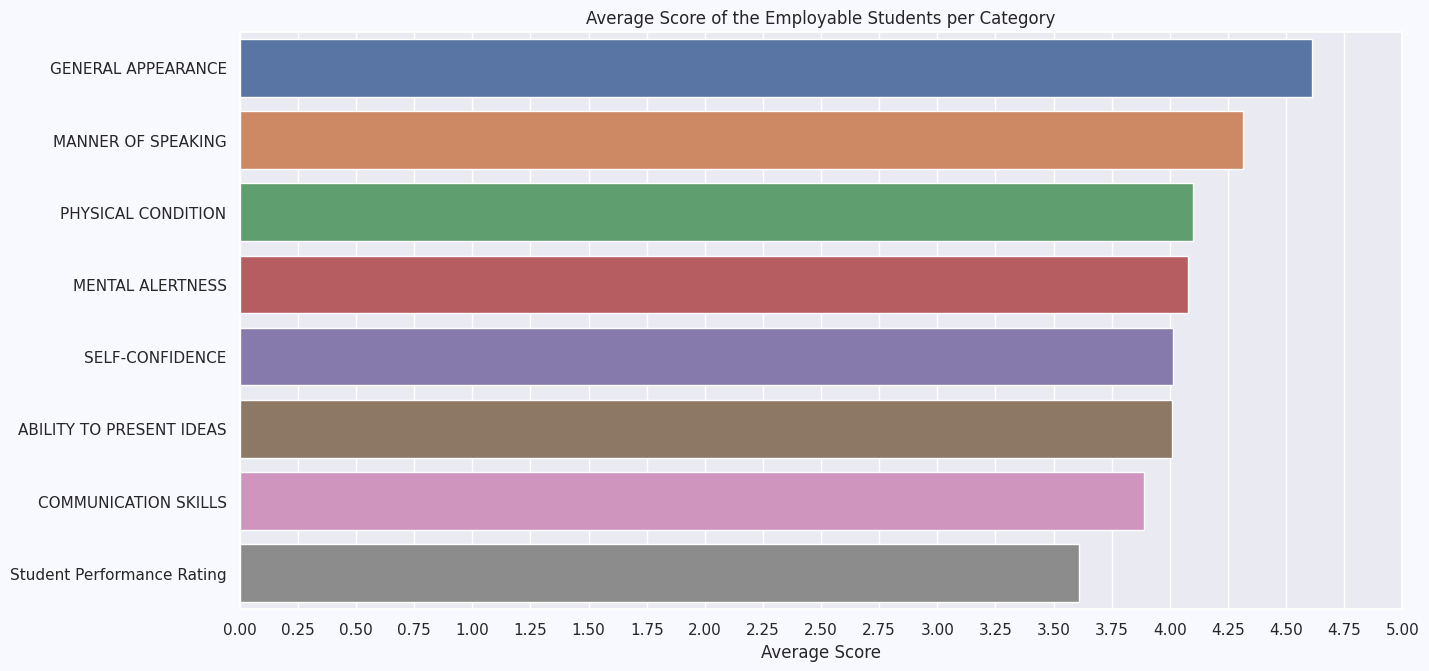

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7.5))
fig.patch.set_facecolor('ghostwhite')


sns.set_theme(style="darkgrid", palette="deep")

sns.barplot(
    y=ave_skills.index,
    x='Average Score',
    data=ave_skills.sort_values('Average Score', ascending=False),
    ax=ax
)

plt.xticks(np.arange(0, 5.25, 0.25))

plt.title('Average Score of the Employable Students per Category')

plt.show()

We can see that the mean scores for employable students are capable of reaching a mark of 4 and above for most of the skills

In [ ]:
employable_students = df.loc[df['CLASS'] == 'Employable']

# Calculate average score for each employable student
average_scores = employable_students.iloc[:, 3:].mean(axis=1)

# Create a new DataFrame to store the results
df_ave = pd.DataFrame({
    'Student': employable_students['Name of Student'],
    'Average Score': average_scores
})






<ipython-input-48-3514f9501b6f>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_scores = employable_students.iloc[:, 3:].mean(axis=1)


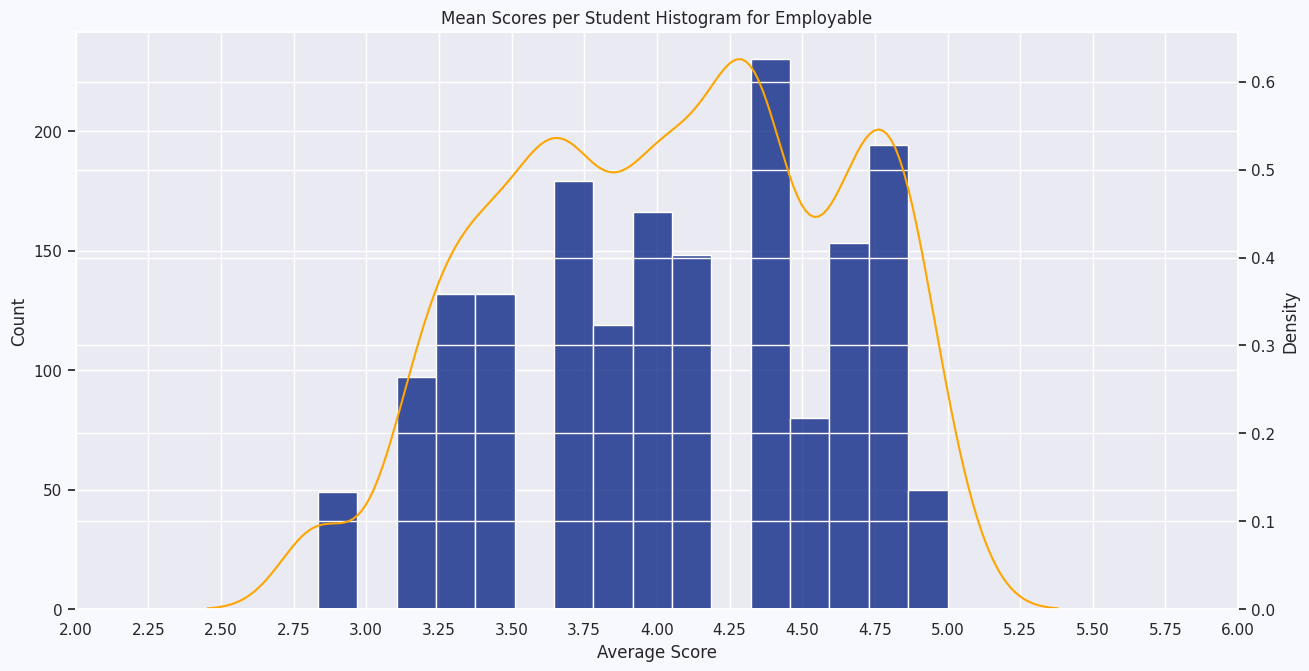

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7.5))
fig.patch.set_facecolor('ghostwhite')
sns.set_theme(style='darkgrid', palette='dark')

# Create a histogram of average scores
sns.histplot(x='Average Score', data=df_ave, ax=ax)

# Overlay a KDE plot of the same data
sns.kdeplot(x='Average Score', data=df_ave, ax=ax.twinx(), color='orange')

# Set the x-axis ticks and plot title
plt.xticks(np.arange(2, 6.25, 0.25))
plt.title('Mean Scores per Student Histogram for Employable')

# Show the plot
plt.show()

The Histogram shows that the minimum scores for the Employable can be at least 3.0 But how about the Less Employable?

In [ ]:
df_less = df[df['CLASS'] == 'LessEmployable'].drop(columns=['CLASS', 'Name of Student'])

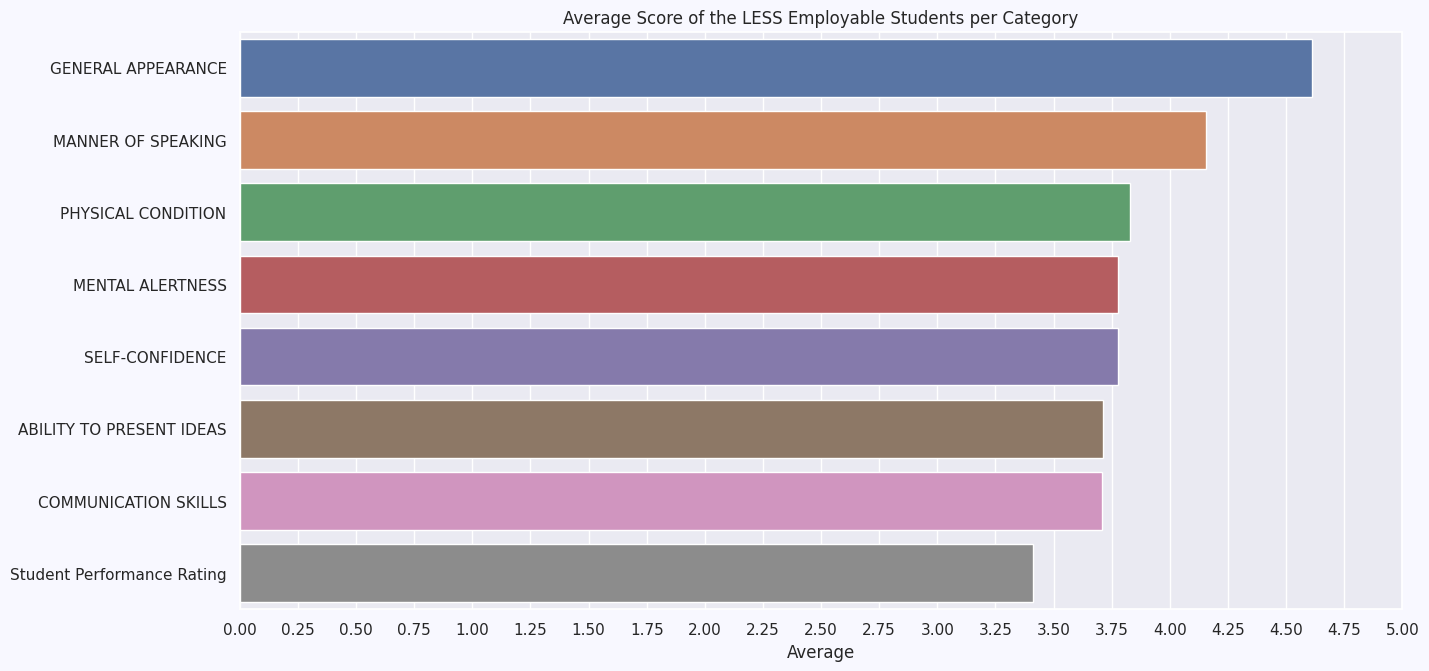

In [ ]:
less_ave_skills = pd.DataFrame({'Average': df_less.mean()})

# Set the size and background color of the plot
fig = plt.figure(figsize=(15, 7.5))
fig.patch.set_facecolor('ghostwhite')

# Set the theme and palette for the plot
sns.set_theme(style="darkgrid", palette="deep")

# Create the barplot
ax = sns.barplot(x='Average', y=less_ave_skills.index, data=less_ave_skills.sort_values('Average', ascending=False))

# Set the xticks
plt.xticks(np.arange(0, 5.25, 0.25))

# Set the title
plt.title('Average Score of the LESS Employable Students per Category')

# Show the plot
plt.show()






Comparing this to the Employable most of the Categories in Less Employable failed to reach an average score of 4, except for general appearance. Whereas in Employable, 5 categories were able to reach an average score of 4.

In both charts we can see that Filipino Students are lacking of Communication skills, but is excelling at General Appearance

In [ ]:
mask_less = df['CLASS'] == 'LessEmployable'
df_ave_less = df[mask_less][['Name of Student']]
df_ave_less['Average Score'] = df[mask_less].iloc[:, 2:].mean(axis=1).values



<ipython-input-53-b63c5ea84684>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ave_less['Average Score'] = df[mask_less].iloc[:, 2:].mean(axis=1).values


In [ ]:
df_ave_less = pd.DataFrame({
    'Student' : df['Name of Student'].loc[
        df['CLASS'] == 'LessEmployable'
    ],
    'Average Score': df.loc[
        df['CLASS'] == 'LessEmployable'
    ]._get_numeric_data().mean(axis = 1)
})

df_ave_less.head()

,Student,Average Score
2,Student 3,3.250
3,Student 4,3.125
10,Student 11,4.875
12,Student 13,3.125
13,Student 14,2.875


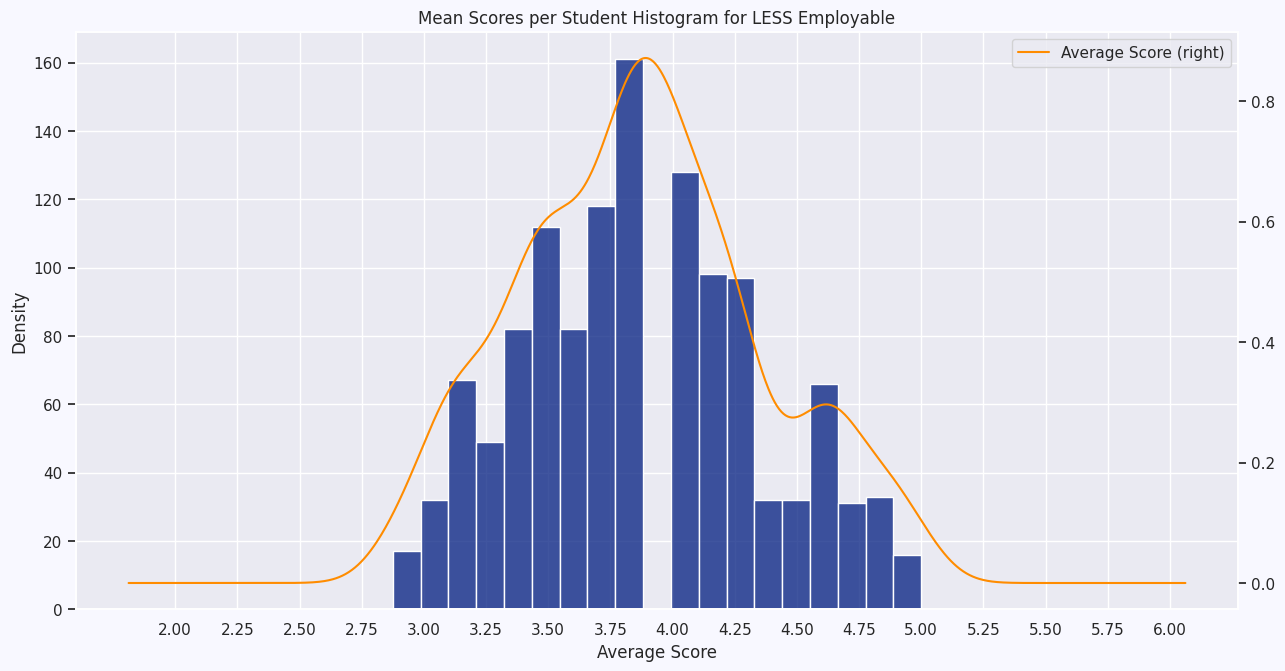

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

sns.set_theme(style='darkgrid', palette = 'dark')

ax = sns.histplot(
    x = 'Average Score',
    data = df_ave_less
)

df_ave_less.plot(
    kind='kde',
    ax=ax,
    secondary_y=True,
    color = 'darkorange'
)

plt.xticks(np.arange(2,6.25,0.25))
plt.title('Mean Scores per Student Histogram for LESS Employable')
plt.show()

Surprisingly, Less Employable Students can also reach an average score of 4 and higher. Lets see where they are lacking.

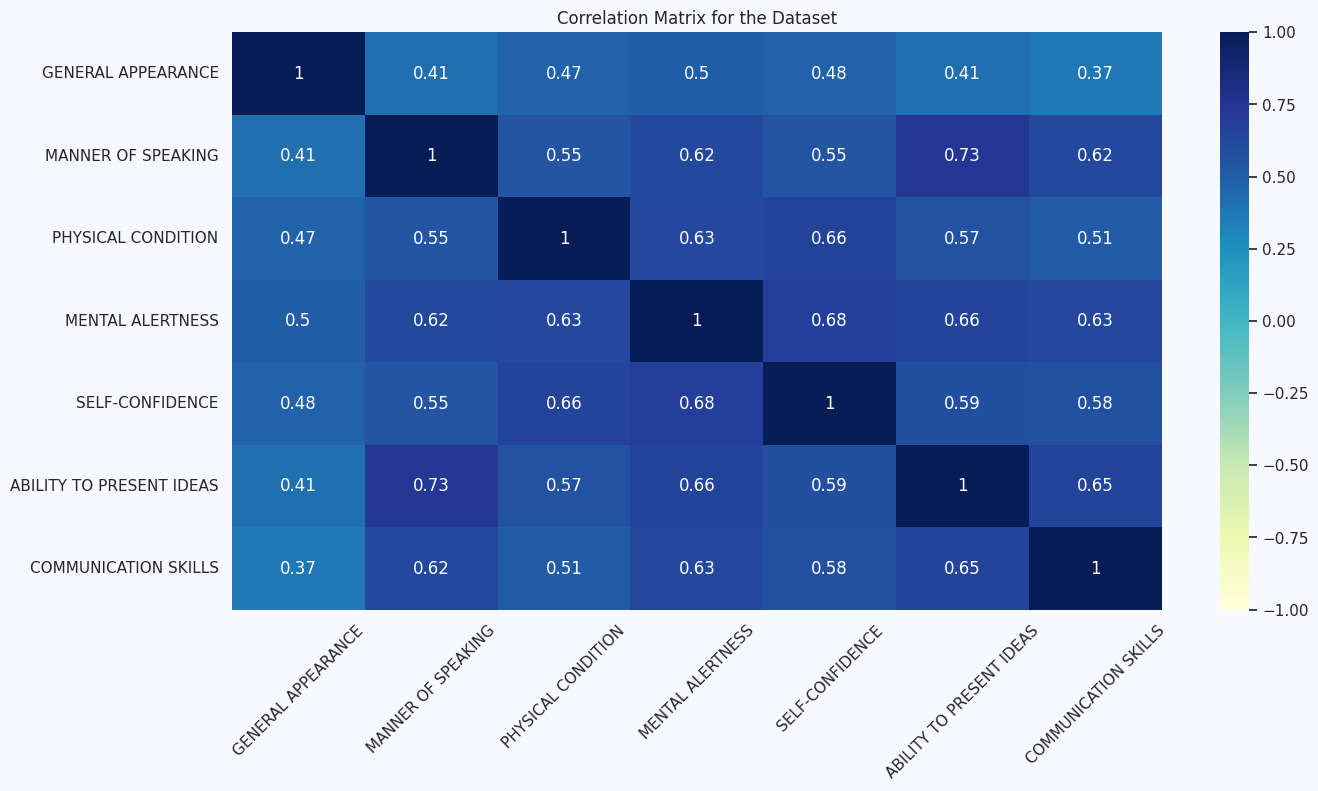

In [ ]:
fig = plt.figure(figsize=(15,7.5))
fig.patch.set_facecolor('ghostwhite')

ax = sns.heatmap(
    df.drop(
        columns = [
            'Name of Student',
            'CLASS',
            'Student Performance Rating'
        ]
    ).corr().round(2),
    annot=True,
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap ='YlGnBu'
)

plt.xticks(rotation = 45)
plt.title("Correlation Matrix for the Dataset")
plt.show()

We can see that there is a strong correlation between Manner of Speaking and The Ability to present ideas with an R of 0.73 and R-square of 0.53.

## Data Pre-processing

Depending on your data, you may need to do some pre-processing. Remember that your goal is to get a "y" which will serve as your target variable and an "X" which will serve as your input/predictor variable. You may try to check how other projects did their pre-processing and try to do it here. Try do describe the pre-processing steps made.

In [ ]:
df_processed = df.drop(columns = ['CLASS', 'Name of Student'])
df_processed = pd.get_dummies(df_processed)

In [ ]:
df_processed

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
0,4,5,4,5,5,5,5,5
1,4,4,4,4,4,4,3,5
2,4,3,3,3,3,3,2,5
3,3,3,3,2,3,3,3,5
4,4,4,3,3,4,4,3,5
...,...,...,...,...,...,...,...,...
2977,4,3,3,3,3,3,2,5
2978,3,4,4,4,4,4,4,5
2979,4,5,4,5,4,4,4,5
2980,4,4,4,3,4,4,3,5


Setting your x and y variables...

In [ ]:
X = df_processed.drop('Student Performance Rating', axis=1)
y = df['Student Performance Rating']

Finally, do the train-test split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Notice that there are some missing values. We can impute the missing values using the mean or average for that column. Or simply, you may just fill all missing values with 0. It will depend on your pre-processing strategy. Try to explain or at least describe your chosen step as you go.

In [ ]:
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

## Model Building

Build your classification or regression model in this section. Refer to your classification and regression notebooks for the code snippets to be used in this section.

- Does the report have a model (methodology) section where details on the model implementation are provided? Does it present results in a systematic manner?

As a sample, Random Forest Classifier was used below. You may try playing with the different parameters inside. Check the scikit-learn documentation for each model. For Random Forest, here's the documentation:  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. There are several parameters that you can play with but common parameters that you can tweak include: n_estimators, max_depth, etc.

Remember that you want a model whose test set score doesn't dip much from the train set score.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
print(f"Train Set Score: {model.score(X_train, y_train)}")
print(f"Test Set Score: {model.score(X_test, y_test)}")

Train Set Score: 0.7425576519916143
Test Set Score: 0.7705192629815746


Optional: As an option, you may try to use GridSearch. Grid search is a hyperparameter optimization technique that is commonly used in machine learning to find the best combination of hyperparameters for a model. The purpose of grid search is to exhaustively search over a range of hyperparameter values for a model and determine the optimal values that yield the best performance on a given metric, such as accuracy or F1 score.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(random_state=42)
pipe = Pipeline(steps=[('rf', model)])
n_estimators = [10, 20, 30, 40, 50, 60]
max_depth = [2, 3, 4, 5]
parameters = dict(rf__n_estimators=n_estimators, rf__max_depth=max_depth)

In [ ]:
clfrf_GS = GridSearchCV(pipe, parameters)
clfrf_GS.fit(X_train, y_train)
print('Best n_estimators:', clfrf_GS.best_estimator_.get_params()['rf__n_estimators'])
print('Best max_depth:', clfrf_GS.best_estimator_.get_params()['rf__max_depth'])
print();
print(clfrf_GS.best_estimator_.get_params()['rf'])

Best n_estimators: 10
Best max_depth: 5

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)


You may use the parameters given by the GridSearch above. As you can see, it led to higher train and test set scores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

print(f"Train Set Score is: {model.score(X_train, y_train)}")
print(f"Test Set Score is: {model.score(X_test, y_test)}")

Train Set Score is: 0.770649895178197
Test Set Score is: 0.7956448911222781


In [ ]:
y_pred = model.predict(X_test)

## Naive Bayes Classifier model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV


nb = MultinomialNB()
params = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}


grid_search = GridSearchCV(estimator=nb, param_grid=params, cv=5, n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)



Best Parameters:  {'alpha': 0.01}
Best Score:  0.7274633123689728


## Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

#splitting data

In [ ]:
imputer = SimpleImputer(strategy="mean")
X_train1 = imputer.fit_transform(X_train1)
X_test1 = imputer.transform(X_test1)

# imputing mean value into training and test sets

In [ ]:
ada = AdaBoostClassifier()
pipe1 = Pipeline(steps=[('ada', ada)])
n_estimators = [50, 100, 200]
learning_rate=[0.01, 0.1, 1.0]
parameters1 = dict(ada__n_estimators=n_estimators, ada__learning_rate=learning_rate)

### Using Grid Search CV

In [ ]:
clfada_GS = GridSearchCV(pipe1, parameters1)
clfada_GS.fit(X_train1, y_train1)
print('Best n_estimators:', clfada_GS.best_estimator_.get_params()['ada__n_estimators'])
print('Best learning_rate:', clfada_GS.best_estimator_.get_params()['ada__learning_rate'])
print();
print(clfada_GS.best_estimator_.get_params()['ada'])

Best n_estimators: 100
Best learning_rate: 0.1

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


Accuracy score is below

In [ ]:
model1 = AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
model1.fit(X_train1, y_train1)
model1.score(X_test1, y_test1)

print(f"Train Set Score is: {model1.score(X_train1, y_train1)}")
print(f"Test Set Score is: {model1.score(X_test1, y_test1)}")

# Below is the accuracy score

Train Set Score is: 0.7337526205450734
Test Set Score is: 0.7520938023450586


In [ ]:
y_pred1 = model1.predict(X_test1)

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# splitting data

In [ ]:
imputer = SimpleImputer(strategy="mean")
X_train2 = imputer.fit_transform(X_train2)
X_test2 = imputer.transform(X_test2)

In [ ]:
dtc = DecisionTreeClassifier()
pipe2 = Pipeline(steps=[('dtc', dtc)])
min_samples_split= [2, 5, 10]
max_depth1= [2, 4, 6, 8, 10]
parameters2 = dict(dtc__min_samples_split=min_samples_split, dtc__max_depth=max_depth1)

Using Grid Search CV

In [ ]:
clfdtc_GS = GridSearchCV(pipe2, parameters2)
clfdtc_GS.fit(X_train2, y_train2)
print('Best min_samples_split:', clfdtc_GS.best_estimator_.get_params()['dtc__min_samples_split'])
print('Best max_depth:', clfdtc_GS.best_estimator_.get_params()['dtc__max_depth'])
print();
print(clfdtc_GS.best_estimator_.get_params()['dtc'])

Best min_samples_split: 2
Best max_depth: 10

DecisionTreeClassifier(max_depth=10)


Accuracy Score is below

In [ ]:
model2 = DecisionTreeClassifier(min_samples_split=2,max_depth=10 )
model2.fit(X_train2, y_train2)
model2.score(X_test2, y_test2)

print(f"Train Set Score is: {model2.score(X_train2, y_train2)}")
print(f"Test Set Score is: {model2.score(X_test2, y_test2)}")

# Below is the accuracy score

Train Set Score is: 0.8477987421383648
Test Set Score is: 0.847571189279732


In [ ]:
y_pred2 = model2.predict(X_test2)

## Results for Random Forest Classifier Model

Present your model metrics here. For classification problems, present the confusion matrix, train and test accuracy, precision, recall and f1-scores. For regression, present the train and test accuracy, error scores.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       1.00      0.27      0.43        66
           4       1.00      0.12      0.21        84
           5       0.79      1.00      0.88       447

    accuracy                           0.80       597
   macro avg       0.93      0.46      0.51       597
weighted avg       0.84      0.80      0.74       597



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 18   0  48]
 [  0  10  74]
 [  0   0 447]]


In [ ]:

importances = model.feature_importances_

# get the names of the columns from X, your input variables. Make sure you assign this correctly as you might
# assign the wrong feature names which may lead to wrong interpretation of the top predictor variables
feature_names = X.columns

# create a dictionary to store the feature importances
feature_importances = dict(zip(feature_names, importances))

# sort the dictionary by values in descending order
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# print the top n predictor variables and their importances
n = 10
for feature, importance in sorted_features[:n]:
    print("{}: {}".format(feature, importance))

ABILITY TO PRESENT IDEAS: 0.2963296275583335
SELF-CONFIDENCE: 0.16248867201127704
GENERAL APPEARANCE: 0.12754577370651404
COMMUNICATION SKILLS: 0.11642792627749918
PHYSICAL CONDITION: 0.11407340209904124
MANNER OF SPEAKING: 0.10043199264577256
MENTAL ALERTNESS: 0.08270260570156249


<BarContainer object of 7 artists>

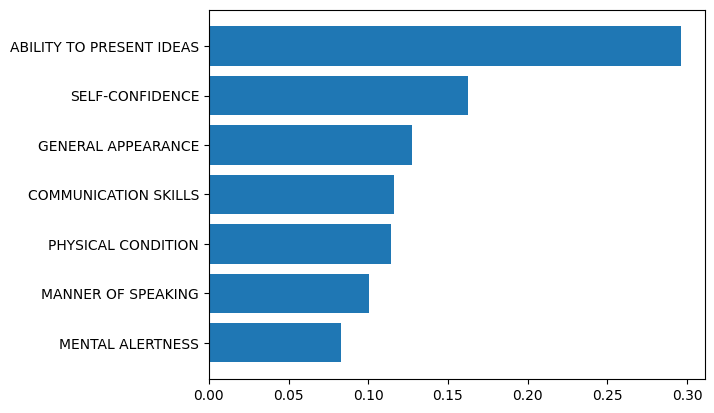

In [ ]:
import matplotlib.pyplot as plt
sorted_idx = model.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx[-10:]], model.feature_importances_[sorted_idx[-10:]])

The top predictor variables are listed above and are ranked from highest to lowest importance. A higher value for a feature indicates that it is more important for predicting the target variable, and a lower value indicates that it is less important. Above, it is saying that gender and income class are the top predictors for someone's survival in the Titanic tragedy.

If you want to determine the direction of the relationship between a predictor variable and the output variable, you can use other methods such as correlation analysis. Correlation analysis can help you determine the strength and direction of the linear relationship between two variables.

## Results for Adaboost Classifier

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           3       1.00      0.03      0.06        66
           4       0.00      0.00      0.00        84
           5       0.75      1.00      0.86       447

    accuracy                           0.75       597
   macro avg       0.58      0.34      0.31       597
weighted avg       0.67      0.75      0.65       597



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)

[[  2   0  64]
 [  0   0  84]
 [  0   0 447]]


## Results for Deciion Classifier

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           3       0.76      0.67      0.71        66
           4       0.75      0.51      0.61        84
           5       0.87      0.94      0.90       447

    accuracy                           0.85       597
   macro avg       0.79      0.71      0.74       597
weighted avg       0.84      0.85      0.84       597



In [ ]:
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

[[ 44   0  22]
 [  0  43  41]
 [ 14  14 419]]


## Recommendations and Insights

Based on the results, present your recommendation and insights here.

- Did the report present interesting insights gleaned from the data and results?
- Did the author talk about important features and why they are strong predictor variables?

## References

Include links and citation to any references used in this project.